# KS Test in Julia

## Loading Data

In [1]:
using DataFrames, CSV, Missings

In [2]:
grn = CSV.readtable("grn.csv");
grn = grn[.!isna.(grn[:sensitivity]), [:name,:randType,:sensitivity]]
grn[:isbio] = isna.(grn[:randType]);

## Plotting Data

In [3]:
using StatPlots
gr();

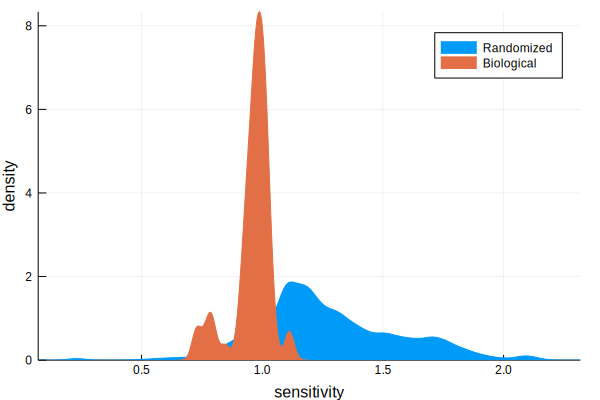

In [4]:
@df grn density(:sensitivity, group={:isbio}, fill=true, label=["Randomized", "Biological"],
                xlabel="sensitivity", ylabel="density")

## Analyzing Data

In [5]:
using StatsBase, HypothesisTests

In [6]:
bio_s = grn[grn[:isbio], :sensitivity];

In [7]:
nonbio = grn[.!isna.(grn[:randType]), :]
rand_s = nonbio[nonbio[:randType] .== "fixed-structure-node-bias irreducible", :sensitivity];

In [8]:
ApproximateTwoSampleKSTest(rand_s, bio_s)

Approximate two sample Kolmogorov-Smirnov test
----------------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.5566899302093712

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           3.9911738941951423e-16

Details:
    number of observations:   [5100,59]
    KS-statistic:              4.2514952235515


In [9]:
bio_ecdf = ecdf(bio_s)
control_ecdf = ecdf(rand_s);

In [10]:
nets = unique(grn[:name])
for net in nets
    netdf = grn[grn[:name] .== net, :]
    bio_value = netdf[netdf[:isbio], :sensitivity]
    cdf = ecdf(netdf[:sensitivity])
    pvalue = first(cdf(bio_value))
    println("$net => p=$pvalue")
end

Apoptosis Network => p=0.01665278934221482
B Bronchiseptica And T Retortaeformis Coinfection => p=0.0008326394671107411
B Cell Differentiation => p=0.0008326394671107411
BT474 Breast Cell Line Long-term ErbB Network => p=0.0008326394671107411
BT474 Breast Cell Line Short-term ErbB Network => p=0.002497918401332223
Body Segmentation In Drosophila 2013 => p=0.03913405495420483
Bordetella Bronchiseptica => p=0.0008326394671107411
Budding Yeast Cell Cycle => p=0.0008326394671107411
Budding Yeast Cell Cycle 2009 => p=0.0008326394671107411
CD4 T Cell Signaling => p=1.0
CD4+ T Cell Differentiation And Plasticity => p=0.000999000999000999
Cardiac Development => p=0.0008326394671107411
Cell Cycle Transcription By Coupled CDK And Network Oscillators => p=0.09408825978351373
Cholesterol Regulatory Pathway => p=0.4479600333055787
Colitis-associated Colon Cancer => p=0.06661115736885928
Cortical Area Development => p=0.6104868913857678
Death Receptor Signaling => p=0.051623646960865945
Differentiat